In [67]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [68]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [69]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [70]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


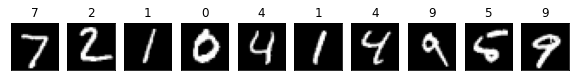

In [71]:
fig, axes = plt.subplots(ncols=10,sharey = True, sharex = False, figsize=(10, 4))
for i in range(10):
    axes[i].set_title(y_test[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [72]:
 
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp) 
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [73]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [74]:
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
 model.add(MaxPool2D((2, 2)))
 model.add(Conv2D(64, (3, 3), activation='relu'))
 model.add(MaxPool2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(10, activation='softmax'))

In [75]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dense_10 (Dense)            (None, 100)              

In [76]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [77]:
model.fit(X_train, y_train, epochs=5, 
          validation_split=0.3)

Epoch 1/5
1050/1313 [======================>.......] - ETA: 8s - loss: 0.4048 - acc: 0.9319

KeyboardInterrupt: ignored

In [ ]:
predictions = model.predict(X_test)
print(predictions.shape)

In [ ]:
predictions = np.argmax(predictions, axis=1)
print(predictions)

In [ ]:
 
fig, axes = plt.subplots(ncols=20,figsize=(20, 4))
for i in range(0,20):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()